# 1. Importer les bibliotheques et DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('youtoxic_english_1000.csv')
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


# 2. nettoyer Data text

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import string
lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import string
lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
newData = data

supprimer xa0 espace

In [10]:
newData['Text'] = newData['Text'].replace(u'\xa0', u' ')

fonction qui supprime les ponctuations , stop words et la lemmatisation sur le texte puis on returne une liste du texte apres nettoyage

In [11]:
def text_nettoyage(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Lemmatize the words
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Lemmatize the words
    nopunc = [lemmatize.lemmatize(word) for word in nopunc.split()]
    # Join the characters again to form the string.
    nopunc = ' '.join(nopunc)
    
    # Now just remove any stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

on applique la fonction "text_nettoyage" sur notre data

In [ ]:
newData['Text'].head(5).apply(text_nettoyage)

0    [people, would, take, step, back, make, case, ...
1    [law, enforcement, trained, shoot, apprehend, ...
2    [dont, reckon, black, life, matter, banner, he...
3    [large, number, people, like, police, officer,...
4    [arab, dude, absolutely, right, shot, 6, extra...
Name: Text, dtype: object

Vérifier si les étiquettes sont équilibrées

<Axes: xlabel='IsToxic', ylabel='count'>

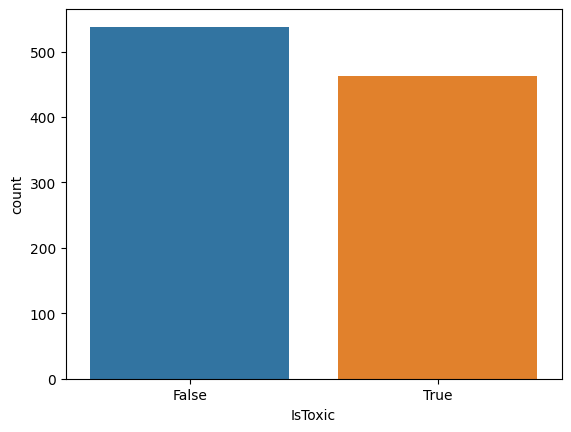

In [12]:
sns.countplot(data=data,x="IsToxic")

#  3-Vectorizing the data

In [13]:
new_Data = []
df = pd.DataFrame(new_Data)

In [16]:
df['CommentId'] = newData['CommentId']
df['VideoId'] = newData['VideoId']
df['Text'] = newData['Text']
df['IsToxic'] = newData['IsToxic']


In [17]:
df.head()

,CommentId,VideoId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

construire un modèle de sac de mots à partir des données textuelles

In [19]:
bow_transformer = CountVectorizer(analyzer=text_nottoyage).fit(df['Text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

4386


In [24]:
message = df['Text'][3]
print(message)

There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers is a testament to the good work that police officers do in protecting the public. When our children or our family are in danger, we do not hessitate to call for help, and we call the Police. Its about time people stopped complaining and started to give the Police some respect for the hard work and dedication that often requires them to put their lives on the line, to serve the public.


application du model sur "message"


In [25]:
bow4 = bow_transformer.transform([message])
print(bow4)
print(bow4.shape)

  (0, 641)	2
  (0, 642)	1
  (0, 713)	1
  (0, 820)	1
  (0, 961)	2
  (0, 1001)	1
  (0, 1039)	1
  (0, 1430)	1
  (0, 1450)	1
  (0, 1674)	1
  (0, 1694)	1
  (0, 1781)	1
  (0, 1816)	1
  (0, 1829)	1
  (0, 2216)	1
  (0, 2277)	1
  (0, 2283)	2
  (0, 2290)	1
  (0, 2681)	1
  (0, 2707)	4
  (0, 2710)	1
  (0, 2830)	2
  (0, 2902)	6
  (0, 3027)	1
  (0, 3053)	2
  (0, 3081)	1
  (0, 3165)	1
  (0, 3246)	1
  (0, 3256)	1
  (0, 3443)	1
  (0, 3664)	1
  (0, 3711)	1
  (0, 3861)	1
  (0, 3936)	1
  (0, 4291)	2
(1, 4386)


In [20]:
text_bow = bow_transformer.transform(df['Text'])

In [21]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (1000, 4386)
Amount of Non-Zero occurences:  15856


Nous allons maintenant utiliser TF-IDF pour donner du poids à chaque mot dans les commentaires

TF(t) = (Nombre de fois que le terme t apparaît dans un document) / (Nombre total de termes dans le document).

IDF(t) = log_e(Nombre total de documents / Nombre de documents contenant le terme t).

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4291)	0.2120470967470687
  (0, 3936)	0.08369391736037236
  (0, 3861)	0.1617147922778925
  (0, 3711)	0.12564438321929247
  (0, 3664)	0.11976432641897239
  (0, 3443)	0.13363811260110242
  (0, 3256)	0.11511075341292093
  (0, 3246)	0.15262758723850595
  (0, 3165)	0.10901622794005865
  (0, 3081)	0.10338381791641837
  (0, 3053)	0.23620686595889043
  (0, 3027)	0.1411790628409497
  (0, 2902)	0.41530956114947426
  (0, 2830)	0.12173186855109545
  (0, 2710)	0.14618011265623532
  (0, 2707)	0.32686048257534106
  (0, 2681)	0.12564438321929247
  (0, 2290)	0.13064543303457812
  (0, 2283)	0.14104111419376966
  (0, 2277)	0.08869496717565799
  (0, 2216)	0.14618011265623532
  (0, 1829)	0.1617147922778925
  (0, 1816)	0.12564438321929247
  (0, 1781)	0.11810343297944521
  (0, 1694)	0.0924389507876739
  (0, 1674)	0.11247102295580497
  (0, 1450)	0.11375204619529704
  (0, 1430)	0.09348154831840144
  (0, 1039)	0.1617147922778925
  (0, 1001)	0.15262758723850595
  (0, 961)	0.3052551744770119
  (0, 820)	0.161

In [27]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(1000, 4386)


# 4. Training the model

In [28]:
from sklearn.model_selection import train_test_split

text_train, text_test, toxic_train, toxic_test = \
train_test_split(df['Text'], df['IsToxic'], test_size=0.2)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

800 200 1000


on utilise la methode du clustring "**k-means**"

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('bow', TfidfVectorizer(analyzer=text_process)),  # strings to weighted TF-IDF scores
    ('clustering', KMeans(n_clusters=2)),  # cluster TF-IDF vectors using K-means
])

# Entraînement du pipeline
pipeline.fit(text_train,toxic_train)

# Prédiction sur les données de test
predictions = pipeline.predict(text_test)

# Évaluation du clustering
print(classification_report(predictions,toxic_test))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.54      0.66       160
           1       0.24      0.60      0.35        40

    accuracy                           0.55       200
   macro avg       0.54      0.57      0.50       200
weighted avg       0.72      0.55      0.59       200



En se basant sur les résultats fournis, le modèle semble avoir une précision élevée pour la classe 0 (0.84) mais une faible précision pour la classe 1 (0.24). Le rappel est plus élevé pour la classe 1 (0.60) que pour la classe 0 (0.54). Le score F1 est également plus élevé pour la classe 1 (0.35) que pour la classe 0 (0.66). L'exactitude globale du modèle est de 0.55.